### ЛР3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# чтение обучающей выборки
data = pd.read_csv('train.csv')

In [6]:
data = data.fillna(5)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,5,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,5,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,5,S


In [7]:
# уберем непонятный для нас параметр, чтобы он не помешал в будущем
data.drop(['Name','Sex','Ticket','Embarked','Cabin','PassengerId'], axis = 1, inplace = True)

In [8]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,5.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [9]:
parts = np.split(data, [5,6], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Survived  Pclass   Age  SibSp  Parch
0       0.0     3.0  22.0    1.0    0.0
1       1.0     1.0  38.0    1.0    0.0
2       1.0     3.0  26.0    0.0    0.0
3       1.0     1.0  35.0    1.0    0.0
4       0.0     3.0  35.0    0.0    0.0 

Выходные данные:

       Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500


## Разделение выборки

In [10]:
 X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.05)

In [11]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Survived  Pclass   Age  SibSp  Parch
561       0.0     3.0  40.0    0.0    0.0
151       1.0     1.0  22.0    1.0    0.0
683       0.0     3.0  14.0    5.0    2.0
438       0.0     1.0  64.0    1.0    4.0
293       0.0     3.0  24.0    0.0    0.0 

Входные параметры тестовой выборки:

      Survived  Pclass   Age  SibSp  Parch
205       0.0     3.0   2.0    0.0    1.0
573       1.0     3.0   5.0    0.0    0.0
251       0.0     3.0  29.0    1.0    1.0
702       0.0     3.0  18.0    0.0    1.0
858       1.0     3.0  24.0    0.0    3.0 

Выходные параметры обучающей выборки:

          Fare
561    7.8958
151   66.6000
683   46.9000
438  263.0000
293    8.8500 

Выходные параметры тестовой выборки:

         Fare
205  10.4625
573   7.7500
251  10.4625
702  14.4542
858  19.2583


In [12]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(846, 5)
(45, 5)
(846, 1)
(45, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [15]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[19.73334]
 [12.51709]
 [15.15749]
 [ 9.2225 ]
 [45.95917]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [16]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [17]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 10.588006666666665
Средняя абсолютная ошибка для 5 ближайших соседей: 11.273649333333333
Средняя абсолютная ошибка для 10 ближайших соседей: 11.872268444444446


In [18]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 779.3416047756667
Средняя квадратичная ошибка для 5 ближайших соседей: 683.0381078963467
Средняя квадратичная ошибка для 10 ближайших соседей: 854.7699862872488


In [19]:
# Оценка коэффициента детерминации

print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: 0.3129712058952545
Коэффициент детерминации для 5 ближайших соседей: 0.39786757858167676
Коэффициент детерминации для 10 ближайших соседей: 0.24647729658305795


In [20]:
## Grid Search (решетчатый поиск)

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров

## GridSearch через среднюю квадратичную ошибку
Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [22]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [23]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=7)

Лучшее число ближайших соседей:

 {'n_neighbors': 7}

Лучшее значение средней квадратичной ошибки:

 -1731.8973707841335


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



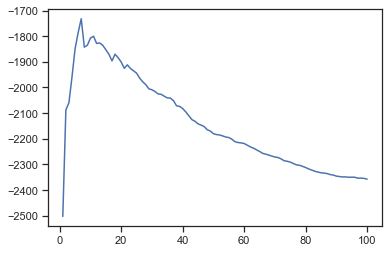

In [24]:
 print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=7)

Лучшее число ближайших соседей:

 {'n_neighbors': 7}

Лучшее значение коэффициента детерминации:

 0.31544803247536024

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



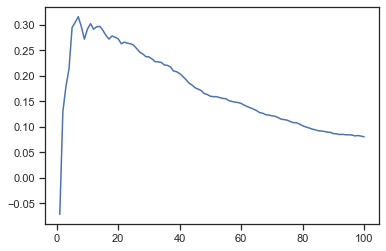

In [25]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [26]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [0.33837682 0.28393262 0.12157948 0.30483026 0.34342333] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.24128219838125292 

- 5 ближайших соседей: 0.2325852340360818 

- 10 ближайших соседей: 0.27842850190835017 

- 50 ближайших соседей: 0.1286895036017584 

- 100 ближайших соседей: 0.05722091440517334 



In [27]:
# 1.Формирование обучающей и тестовой выборки
iris = load_iris()
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

In [28]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(iris_X_train, iris_y_train)
target1_0 = cl1_1.predict(iris_X_train)
target1_1 = cl1_1.predict(iris_X_test)
accuracy_score(iris_y_train, target1_0), accuracy_score(iris_y_test, target1_1)

(0.68, 0.6266666666666667)

In [29]:
# 3.Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=50), 
                         iris.data, iris.target, 
                         cv=LeaveOneOut())
scores, np.mean(scores)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 0.9266666666666666)

In [30]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [31]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_gs.fit(iris.data, iris.target)

CPU times: user 2.7 s, sys: 41.4 ms, total: 2.74 s
Wall time: 2.77 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [32]:
clf_gs.best_params_

{'n_neighbors': 20}

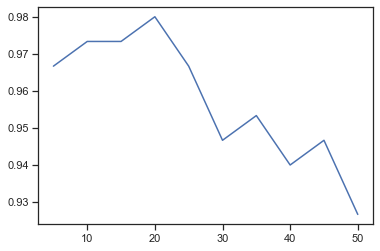

In [33]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [34]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(iris_X_train, iris_y_train)
target2_0 = clf_gs.best_estimator_.predict(iris_X_train)
target2_1 = clf_gs.best_estimator_.predict(iris_X_test)

In [35]:
# Новое качество модели
accuracy_score(iris_y_train, target2_0), accuracy_score(iris_y_test, target2_1)

(0.9733333333333334, 0.9466666666666667)

In [36]:
# Качество модели до подбора гиперпараметров
accuracy_score(iris_y_train, target1_0), accuracy_score(iris_y_test, target1_1)

(0.68, 0.6266666666666667)

In [37]:
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=5', 
                    iris.data, iris.target, cv=20, train_sizes=np.linspace(.2, 1.0, 5))

NameError: name 'plot_learning_curve' is not defined